In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import sys
sys.path.append('..')
sys.path.append('../src')
import os
from os.path import join as oj
import numpy as np
from copy import deepcopy
import pandas as pd
import data
# import models
from math import ceil
# from style import *
import dvu
import pickle as pkl
# from style import *
import viz
from viz import *
import config
import outcomes
outcome_def = 'y_consec_thresh' # don't change, since weve already selected some good events

In [2]:
# df = data.get_data(use_processed=True) #, dset='orig') # all_data=True
df = data.get_data(dset='vps4_snf7')
df = outcomes.add_aux_dyn_outcome(df)
# dfv = df[~(df.short | df.long | df.hotspots)]
# dfv = dfv[dfv.lifetime > 15] # only keep hard tracks
# dfv = df[df['valid'] == 1] # exclude test cells, short/long tracks, hotspots

print(f"Data was collected at {len(df['X'].iloc[1]) / df.lifetime.iloc[1]} Hz")

Data was collected at 1.1904761904761905 Hz


In [ ]:
df_mutant = data.get_data(dset='vps4_snf7___key=mt')
df_mutant = outcomes.add_aux_dyn_outcome(df_mutant)
# dfv = df[~(df.short | df.long | df.hotspots)]
# dfv = dfv[dfv.lifetime > 15] # only keep hard tracks
# dfv = df[df['valid'] == 1] # exclude test cells, short/long tracks, hotspots



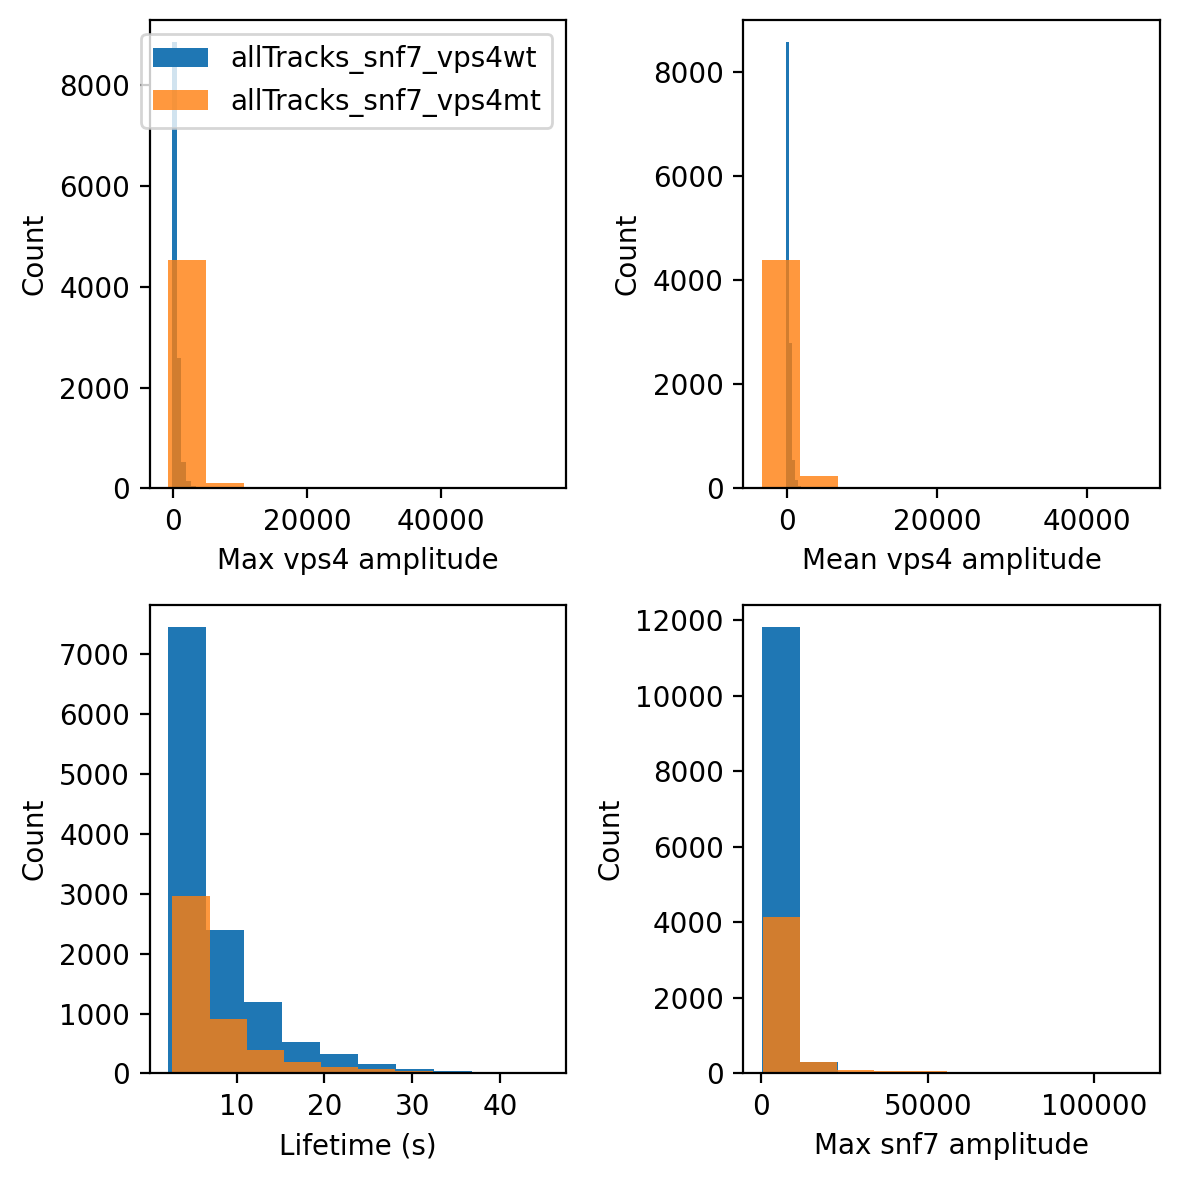

In [19]:
R, C = 2, 2
plt.figure(figsize=(6, 6), dpi=200)
plt.subplot(R, C, 1)
plt.hist(df['Y_max'], label='allTracks_snf7_vps4wt')
plt.hist(df_mutant['Y_max'], label='allTracks_snf7_vps4mt', alpha=0.8)
plt.ylabel('Count')
plt.xlabel('Max vps4 amplitude')
plt.legend()

plt.subplot(R, C, 2)
plt.hist(df['Y_mean'], label='allTracks_snf7_vps4wt')
plt.hist(df_mutant['Y_mean'], label='allTracks_snf7_vps4mt', alpha=0.8)
plt.ylabel('Count')
plt.xlabel('Mean vps4 amplitude')

plt.subplot(R, C, 3)
plt.hist(df['lifetime_s'])
plt.hist(df_mutant['lifetime_s'], alpha=0.8)
plt.ylabel('Count')
plt.xlabel('Lifetime (s)')


plt.subplot(R, C, 4)
plt.hist(df['X_max'], label='allTracks_snf7_vps4wt')
plt.hist(df_mutant['X_max'], label='allTracks_snf7_vps4mt', alpha=0.8)
plt.ylabel('Count')
plt.xlabel('Max snf7 amplitude')

plt.tight_layout()
plt.show()

# look at random examples

Text(0.5, 0, 'Time (s)')

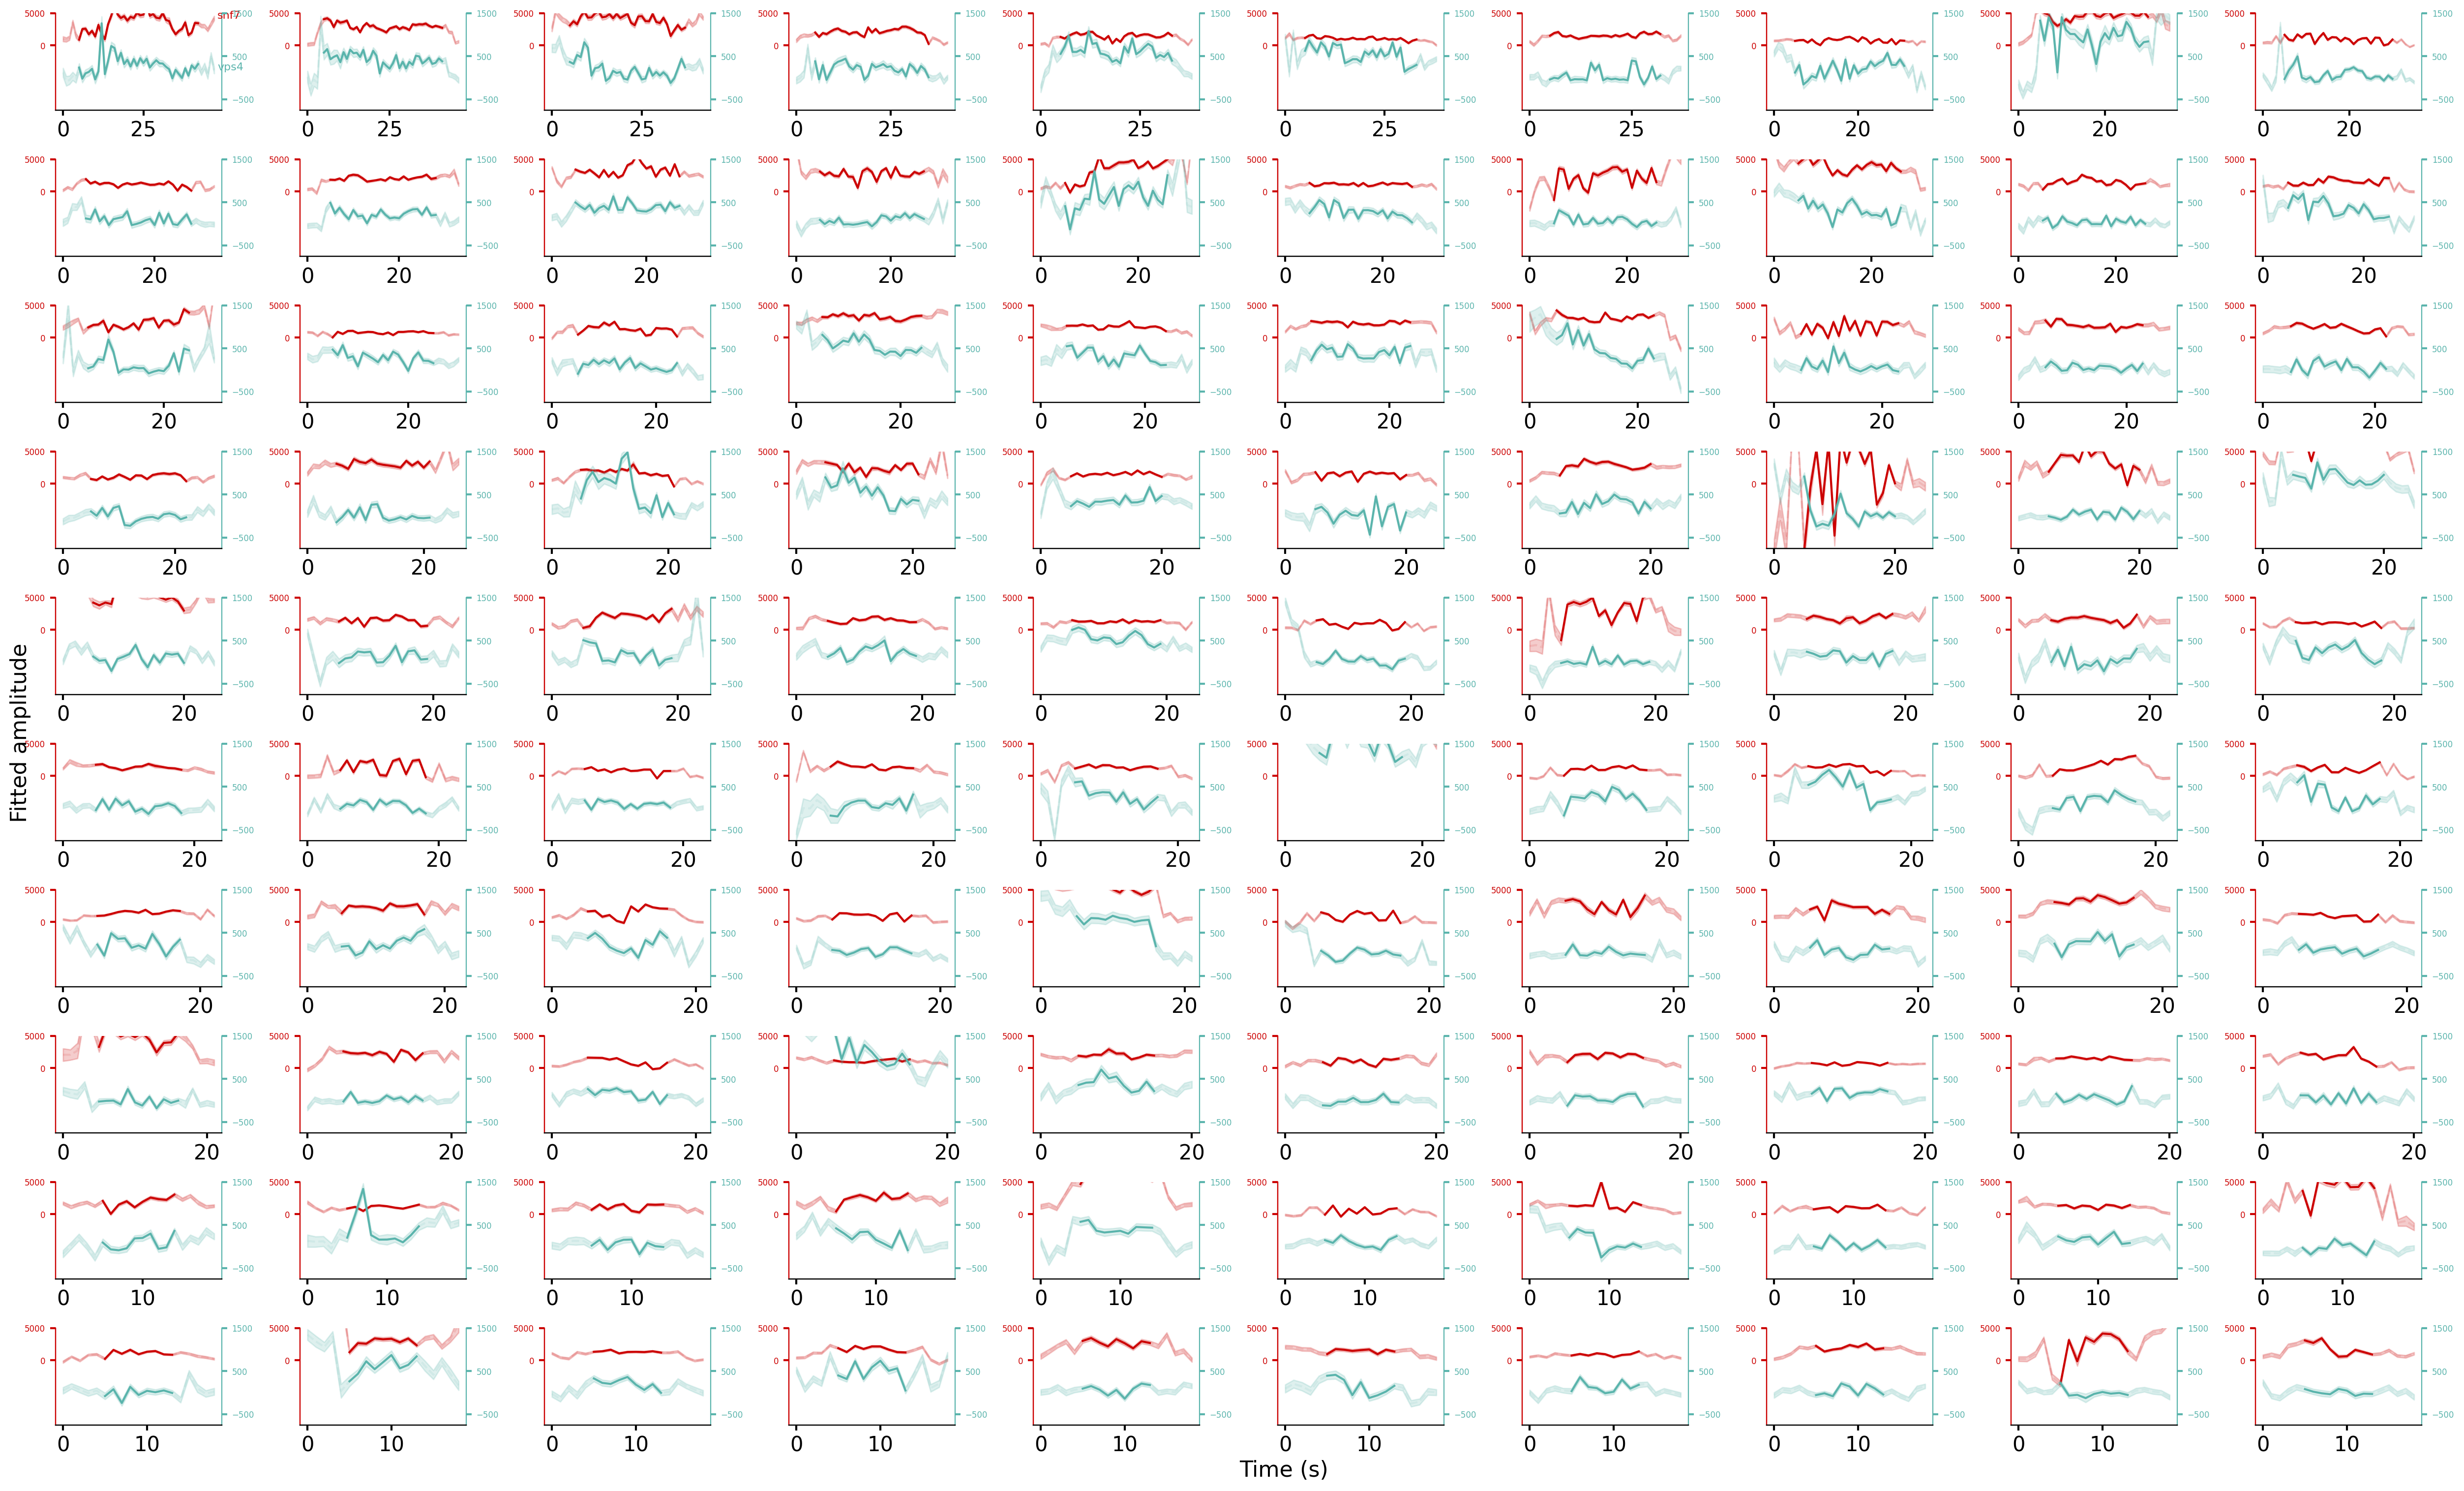

In [19]:
d = df
fig = plt.figure(figsize=(25, 15), dpi=200, facecolor='w')
viz.plot_curves(d, R=10, C=10, hline=False,
                xlim_constant=False,
                ylim_constant=True,
                num_axes=2,
                xlim=(0, 55),
                ylim_cla=(-500, 7500),
                ylim_aux=(-500, 1500),
                yticks=[0, 5000, 10000],
                clath_lab='snf7',
                aux_lab='vps4',             
                legend=False,
                #yticklabels=["$0$", "$10^4$"],                
                fig=fig)
plt.tight_layout()
fig.text(0, 0.5, 'Fitted amplitude', va='center', rotation='vertical', fontsize=16)
fig.text(0.5, 0, 'Time (s)', va='center', fontsize=16)

# viz.savefig('supp_grid')
#plt.show()

**plot curves (for intro fig)**

In [ ]:
d = df #pd.DataFrame()

# ds = df[df.lifetime == 33].sort_values('X_max')
#     #ds = ds[ds.cell_num == ds.cell_num.values[0]].sort_values('X_max')
# d = d.append(ds.iloc[[3 * (len(ds) // 10), 8 * (len(ds) // 10), 9 * (len(ds) // 10)]])

fig = plt.figure(figsize=(25, 15), dpi=200, facecolor='w')
viz.plot_curves(d, R=10, C=10, hline=False,
                xlim_constant=True,
                ylim_constant=False,
                legend=False,
                ylim_cla=(-500, 8000),
                ylim_aux=(-500, 4000),
                yticks=None,
                num_axes=2,
                background=False,
                axes_invisible=True,
                clath_lab='snf7',
                aux_lab='vps4',
                #yticklabels=["$0$", "$10^4$"],                
                fig=fig)
plt.tight_layout()

viz.savefig('intro_vps')
plt.show()

In [ ]:
R, C = 2, 2
plt.figure(facecolor='w', figsize=(5, 5))
viz.plot_curves(dfv.iloc[[0, 1, 48, 37]], extra_key='Z', extra_key_label='Dynamin',
                R=R, C=R, fig=True, ylim_constant=True, legend=False, hline=False)
plt.subplot(R, C, 2)
plt.legend(fontsize=20, frameon=False, handlelength=0.7)
for i in range(R * C):
    plt.subplot(R, C, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.xlim((0, 60))
viz.savefig('intro_curves')

**plot curves (for examples fig)**

In [ ]:
plt.figure(figsize=(3, 8))
R, C = 3, 1
dfv_minus = dfv[dfv[outcome_def] == 0].sort_values('X_max')
viz.plot_curves(dfv_minus, R=R, C=C, fig=True, extra_key='Z',
                ylim_constant=True, legend=False, hline=False)
plt.xlabel('Time (frames)')
plt.ylabel('Amplitude')
plt.subplot(R, C, 1)
# plt.legend(fontsize=18)
r = dfv_minus.iloc[0]
plt.text(len(r.X), r.X[-1], 'Clathrin', color=cr, fontsize=20)
# plt.title('A', loc='left', fontweight='bold')
plt.text(len(r.Z), 50, 'Dynamin', color='gray', fontsize=20)
plt.text(len(r.Y), 0, 'Auxilin', color=cg, fontsize=20)
plt.title('Abortive')
plt.tight_layout()
viz.savefig('traces_minus')
# plt.savefig('figs/fig_traces_minus.pdf')

plt.figure(figsize=(3, 8))
dfv_plus = dfv[(dfv[outcome_def] == 1) & (dfv.lifetime < 50)].sort_values('Y_max', ascending=False)
viz.plot_curves(dfv_plus, R=R, C=C, fig=True, extra_key='Z',
                ylim_constant=True, legend=False, hline=False)
plt.xlabel('Time (frames)')
plt.ylabel('Amplitude')
plt.subplot(R, C, 1)
# plt.title('B', loc='left', fontweight='bold')
plt.title('Valid')
plt.tight_layout()
viz.savefig('traces_plus')
# plt.savefig('figs/fig_traces_plus.pdf')

## make grid version of figs¶

### grid of curves

In [ ]:
d = df # pd.DataFrame()

# ds = df[df.lifetime == 33].sort_values('X_max')
#     #ds = ds[ds.cell_num == ds.cell_num.values[0]].sort_values('X_max')
# d = d.append(ds.iloc[[3 * (len(ds) // 10), 8 * (len(ds) // 10), 9 * (len(ds) // 10)]])

# for l in [69]:
#     ds = df[df.lifetime == l].sort_values('X_max')
#     #ds = ds[ds.cell_num == ds.cell_num.values[0]].sort_values('X_max')
#     d = d.append(ds.iloc[[3 * (len(ds) // 10), 5 * (len(ds) // 10), 6 * (len(ds) // 10)]])
    
#for l in [96]:
#    ds = df[df.lifetime == l].sort_values('X_max')
    #ds = ds[ds.cell_num == ds.cell_num.values[0]].sort_values('X_max')
#    d = d.append(ds.iloc[[3 * (len(ds) // 10), 6 * (len(ds) // 10), 8 * (len(ds) // 10)]])

# print(d)
fig = plt.figure(figsize=(12, 5), dpi=200)
viz.plot_curves(d, R=2, C=3, hline=False,
                xlim_constant=True,
                ylim_constant=False,
                legend=True,
#                 extra_key='Z_extended',
#                 extra_key_label='Dynamin',
                #xlim=(0, 55),
                num_axes=2,
                ylim_cla=(-500, 8000),
                ylim_aux=(-500, 4000),
                ylim_dyn=(-500, 4000),
                yticks=[0, 2000],
                background=True,
                #yticklabels=["$0$", "$10^4$"],                
                fig=fig)
fig.text(-.01, 0.5, 'Fitted amplitude', va='center', rotation='vertical', fontsize=16)
fig.text(0.5, 0, 'Time (s)', va='center', fontsize=16)
plt.tight_layout()
#plt.subplot(2, 3, 6)
#dvu.line_legend()
#plt.xlim((0, 55))

#plt.subplot(2, 2, 4)
#plt.ylabel('Fitted amplitude')

#plt.subplot(2, 2, 4)
#plt.xlabel('Lifetime')


viz.savefig('intro_grid')
plt.show()

# dset sizes

In [ ]:
viz.print_metadata(acc=None, metadata_file='processed/metadata_clath_aux.pkl')

In [85]:
df_test = df[df.cell_num.isin(config.SPLITS['orig']['test'])]

In [88]:
print('valid', df_test.shape[0], df_test[outcome_def].sum())

valid 2497 561.0


In [91]:
d = df_test[~df_test['short'] & ~df_test['long']]
print('difficult', d.shape[0], d[outcome_def].sum())

difficult 1045 469.0


# compare outcome defns

In [9]:
print(y1.sum(), y2.sum(), (y2 & ~y1).sum())

23420 21084 0


In [ ]:
y1 = df['successful_dynamin']
y2 = df['successful_full']
d = df[y1 & ~y2].iloc[1:]
    
fig = plt.figure(figsize=(8*4, 8*2), dpi=200, facecolor='w')
viz.plot_curves(d, R=6, C=10, hline=False,
                xlim_constant=True,
                ylim_constant=False,
                legend=True,
                extra_key='Z_extended',
                extra_key_label='Dynamin',
                #xlim=(0, 55),
                ylim_cla=(-500, 8000),
                ylim_aux=(-500, 4000),
                ylim_dyn=(-500, 4000),
                yticks=None,
                background=True,
                axes_invisible=False,
                #yticklabels=["$0$", "$10^4$"],                
                fig=fig)
# for i in range(4):
#     plt.subplot(2, 2, i + 1)
#     plt.xticks([])
#     plt.yticks([])
# fig.text(-.01, 0.5, 'Fitted amplitude', va='center', rotation='vertical', fontsize=16)
# fig.text(0.5, 0, 'Time (s)', va='center', fontsize=16)
plt.tight_layout()
#plt.subplot(2, 3, 6)
#dvu.line_legend()
#plt.xlim((0, 55))

#plt.subplot(2, 2, 4)
#plt.ylabel('Fitted amplitude')

#plt.subplot(2, 2, 4)
#plt.xlabel('Lifetime')


viz.savefig('defn_diffs')
plt.show()